In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
import numpy as np
import torch
from pathlib import Path
from grammar_ninja.data.grammar.processing import PromptTemplate, PROMPT_TEMPLATE_PATHS
from grammar_ninja.model.grammar.mistral_7b import load_model, load_tokenizer
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
DATA_DIR = Path("/projectnb/cs505ws/projects/grammar_ninja_alavaee/data/grammar/processed")

In [11]:
coedit = pd.read_parquet(DATA_DIR.joinpath("coedit", "train.parquet"))

In [12]:
coedit

,task,prompts,input_text,output_text
0,gec,Remove all grammatical errors from this text,"For example, countries with a lot of deserts ...","For example, countries with a lot of deserts c..."
1,gec,Improve the grammaticality,"As the number of people grows, the need of ha...","As the number of people grows, the need for a ..."
2,gec,Improve the grammaticality of this sentence,Besides some technologically determinists tha...,Besides some technological determinists that a...
3,gec,Remove all grammatical errors from this text,Safety is one of the crucial problems that ma...,Safety is one of the crucial problems that man...
4,gec,Fix grammaticality in this sentence,On one hand more and more virus and hack can ...,"On the one hand, more and more viruses and hac..."
...,...,...,...,...
69066,clarity,Rewrite this sentence for clarity,The Habsburgyears also ushered in the Spanish...,"During the Habsburg's period, Spain ushered in..."
69067,clarity,Rewrite the sentence more clearly,The Habsburgyears also ushered in the Spanish...,The Habsburgyears also ushered in the Spanish ...
69068,clarity,Make this sentence more readable,"In 2019, he was traded to the Astros in a blo...","In 2019, he was traded to the Astros in a bloc..."
69069,clarity,Use clearer wording,"In 2019, he was traded to the Astros in a blo...","In 2019, he was traded to the Astros in a bloc..."


In [13]:
input_text_lengths = coedit["input_text"].map(lambda t: len(t)).to_numpy()

In [14]:
prompt_template = PromptTemplate(prompt_template_path=PROMPT_TEMPLATE_PATHS / "template.txt")

In [15]:
print(prompt_template.format_prompt(sentence="Hellow there!", corrected_sentence="Hello there!"))

Instruction: Your task is to meticulously correct the grammar of the sentence provided under 'Sentence'. This includes fixing issues like incorrect verb tenses, subject-verb agreement, improper punctuation, and spelling mistakes. Additionally, enhance the sentence's syntax and cohesion, and strengthen its overall construction. Ensure that the 'Corrected Sentence' reflects these improvements while preserving the original meaning and intent of the input.

### Sentence:
Hellow there!

### Corrected Sentence:
Hello there!


In [16]:
model = load_model(pretrained_model_name_or_path="mistralai/Mistral-7B-v0.1")
tokenizer = load_tokenizer(pretrained_model_name_or_path="mistralai/Mistral-7B-v0.1")

pytorch_model-00002-of-00002.bin:   0%|          | 10.5M/5.06G [00:00<06:31, 12.9MB/s]


KeyboardInterrupt: 

(array([3.9502e+04, 2.1224e+04, 7.2140e+03, 9.7500e+02, 8.6000e+01,
        4.2000e+01, 1.7000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([  6. ,  91.5, 177. , 262.5, 348. , 433.5, 519. , 604.5, 690. ,
        775.5, 861. ]),
 <BarContainer object of 10 artists>)

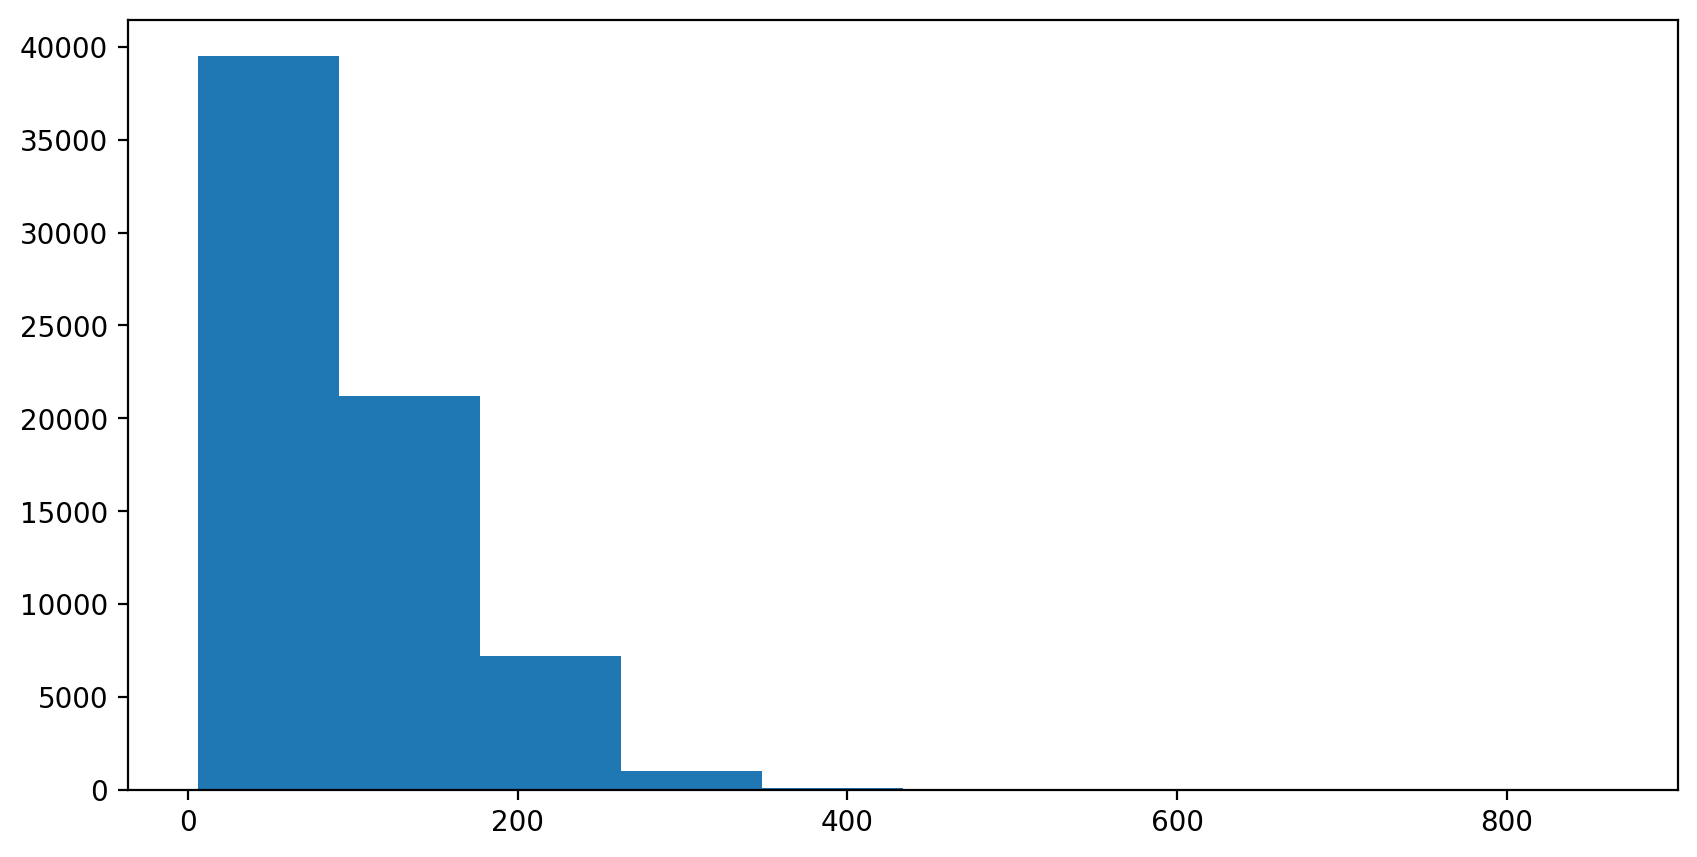

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.hist(input_text_lengths)

In [ ]:
input_text_lengths.mean(), output_text_lengths.mean()

(99.95798526154248, 98.24137481721706)